In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## EDA

In [4]:
train

,age,sex,bmi,children,smoker,region,risc,potential,y
0,56.0,1,34.430,0,0.0,2,1,0.131349,10594.22570
1,18.0,1,33.660,0,0.0,2,0,0.565934,1136.39940
2,54.0,1,21.010,2,0.0,2,1,NaN,11013.71190
3,56.0,0,32.300,3,0.0,0,1,0.373704,13430.26500
4,33.0,1,30.250,0,0.0,2,0,NaN,3704.35450
...,...,...,...,...,...,...,...,...,...
931,56.0,1,19.950,0,1.0,0,1,NaN,22412.64850
932,45.0,0,31.790,0,0.0,2,1,0.655507,17929.30337
933,28.0,1,30.875,0,0.0,1,0,0.459789,3062.50825
934,20.0,0,22.420,0,1.0,1,0,NaN,14711.74380


In [5]:
train.isna().sum()

age            9
sex            0
bmi            0
children       0
smoker        16
region         0
risc           0
potential    498
y              0
dtype: int64

In [6]:
train.dtypes

age          float64
sex            int64
bmi          float64
children       int64
smoker       float64
region         int64
risc           int64
potential    float64
y            float64
dtype: object

In [6]:
train.describe()

,age,sex,bmi,children,smoker,region,risc,potential,y
count,927.000000,936.000000,936.000000,936.000000,920.000000,936.000000,936.000000,438.000000,936.000000
mean,46.048544,0.517094,30.597943,1.101496,0.208696,1.509615,0.502137,0.507874,13158.211579
std,160.699103,0.499975,6.139263,1.218115,0.406597,1.108988,0.500263,0.291749,11917.586152
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000221,1121.873900
25%,26.000000,0.000000,26.196250,0.000000,0.000000,0.750000,0.000000,0.265917,4710.601913
50%,39.000000,1.000000,30.300000,1.000000,0.000000,2.000000,1.000000,0.510939,9178.152825
75%,51.000000,1.000000,34.520000,2.000000,0.000000,2.000000,1.000000,0.758098,16818.539955
max,4490.000000,1.000000,53.130000,5.000000,1.000000,3.000000,1.000000,0.995279,63770.428010


- We can clearly see that `age` has outliers

In [7]:
train[train.age > 70]

,age,sex,bmi,children,smoker,region,risc,potential,y
465,2030.0,0,23.98,2,NaN,2,0,NaN,8211.1002
609,4490.0,0,40.66,0,0.0,0,0,NaN,9875.6804


- Only 2 values, it's better do discard them or change to a value similar to the current data

In [8]:
# train.drop(index=[465,609],axis=0,inplace=True)
train['age'][465] = 20
train['age'][609] = 49

/tmp/ipykernel_7905/722745458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['age'][465] = 20
/tmp/ipykernel_7905/722745458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['age'][609] = 49


In [9]:
train[train.smoker.isna()] # just as the patterns, index 749 and 769 are probably 1, the rest is 0

,age,sex,bmi,children,smoker,region,risc,potential,y
57,59.0,0,27.720,3,NaN,2,0,0.820497,14001.13380
58,41.0,0,36.080,1,NaN,2,0,0.380247,6781.35420
60,61.0,1,32.300,2,NaN,1,1,NaN,14119.62000
69,30.0,0,28.405,1,NaN,1,0,0.429544,4527.18295
194,37.0,0,23.370,2,NaN,1,0,NaN,6686.43130
281,58.0,0,32.395,1,NaN,0,1,NaN,13019.16105
301,49.0,0,21.300,1,NaN,3,1,0.437842,9182.17000
344,36.0,1,28.880,3,NaN,0,0,NaN,6748.59120
432,49.0,1,25.840,1,NaN,0,0,0.321268,9282.48060
465,20.0,0,23.980,2,NaN,2,0,NaN,8211.10020


In [10]:
train['smoker'][749] = 1
train['smoker'][769] = 1

/tmp/ipykernel_7905/3728926285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['smoker'][749] = 1
/tmp/ipykernel_7905/3728926285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['smoker'][769] = 1


In [11]:
train['smoker'][train[train.smoker.isna()].index] = 0

/tmp/ipykernel_7905/2728150780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['smoker'][train[train.smoker.isna()].index] = 0


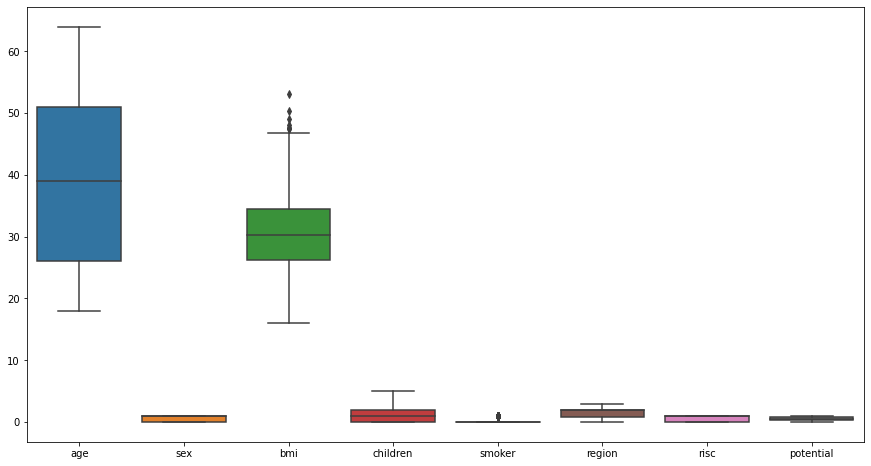

In [12]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=train.drop('y',axis=1), orient="v")

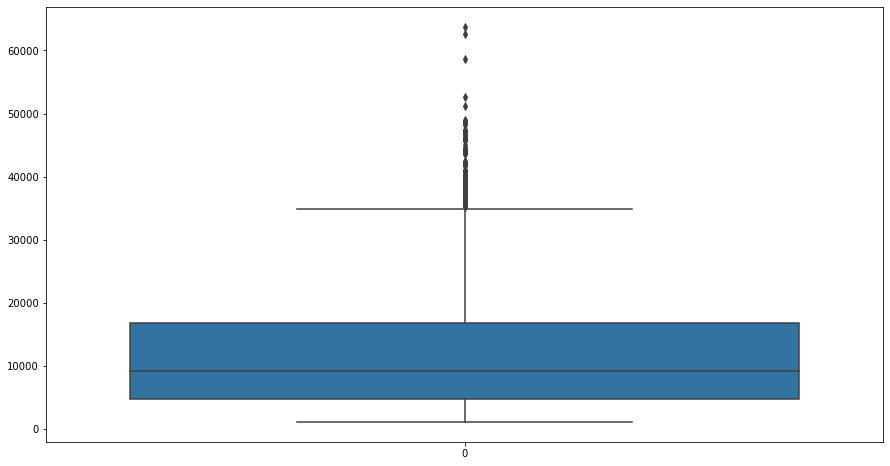

In [13]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=train.y, orient="v")

In [14]:
test

,age,sex,bmi,children,smoker,region,risc,potential
0,29.0,0,38.83,3,0.0,2,0,NaN
1,28.0,0,33.40,0,0.0,3,1,NaN
2,33.0,1,29.40,4,0.0,3,1,NaN
3,33.0,1,35.75,1,1.0,2,0,NaN
4,51.0,1,35.97,1,0.0,2,0,NaN
...,...,...,...,...,...,...,...,...
397,32.0,0,23.65,1,0.0,2,1,0.872466
398,58.0,0,33.44,0,0.0,1,0,NaN
399,25.0,1,23.90,5,0.0,3,1,NaN
400,18.0,0,40.28,0,0.0,0,0,NaN


In [15]:
test.describe()

,age,sex,bmi,children,smoker,region,risc,potential
count,400.000000,402.000000,402.000000,402.000000,398.000000,402.000000,402.000000,185.000000
mean,39.272500,0.477612,30.815796,1.079602,0.201005,1.529851,0.504975,0.493610
std,14.068156,0.500121,6.006271,1.176932,0.401256,1.096517,0.500598,0.274098
min,18.000000,0.000000,17.195000,0.000000,0.000000,0.000000,0.000000,0.002565
25%,26.000000,0.000000,26.623750,0.000000,0.000000,1.000000,0.000000,0.276750
50%,38.500000,0.000000,30.495000,1.000000,0.000000,2.000000,1.000000,0.469876
75%,52.000000,1.000000,34.920000,2.000000,0.000000,2.750000,1.000000,0.742634
max,64.000000,1.000000,52.580000,5.000000,1.000000,3.000000,1.000000,0.995311


In [16]:
test.isna().sum()

age            2
sex            0
bmi            0
children       0
smoker         4
region         0
risc           0
potential    217
dtype: int64

In [17]:
test[test.smoker.isna()]

,age,sex,bmi,children,smoker,region,risc,potential
58,50.0,0,44.745,0,NaN,0,1,NaN
76,58.0,1,36.955,2,NaN,1,1,0.751767
86,53.0,1,28.600,3,NaN,3,1,0.144793
106,28.0,0,33.110,0,NaN,2,0,NaN


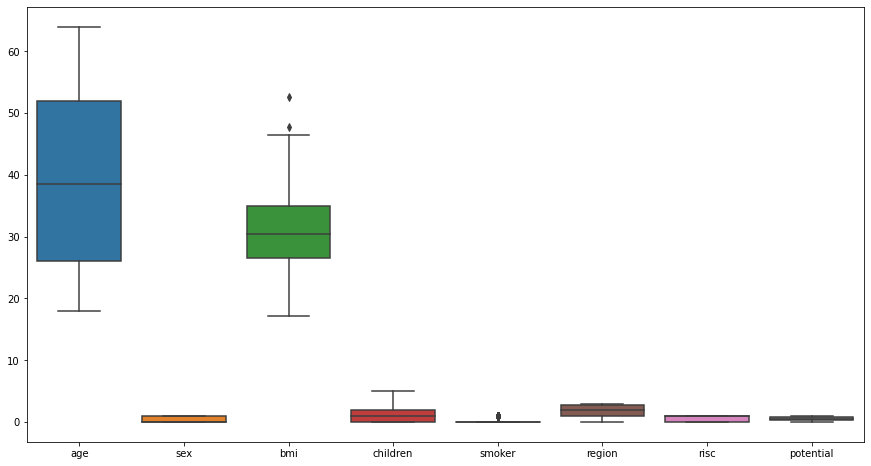

In [18]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=test, orient="v")

In [19]:
train.smoker.value_counts()

0.0    742
1.0    194
Name: smoker, dtype: int64

- Maybe replacing the NaN values for `smoker` with `0` is a great idea, since only 4/936 values are missing and +75% of the people are non smokers

In [20]:
#train.smoker.fillna(0,inplace=True)
test.smoker.fillna(0,inplace=True)

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='potential'>

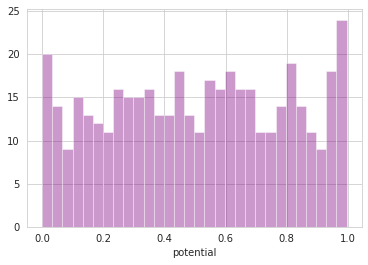

In [21]:
sns.set_style('whitegrid')
sns.distplot(train.potential, kde = False, color ='purple', bins = 30)

- We can see `potential` has a sort of a `"uniform distribution"`. Maybe changing values < 0.5 to 0 and values >= 0.5 to 1 can lead to better correlation with the target variable (test it after 1st submission, make imputation w/ the current train data).

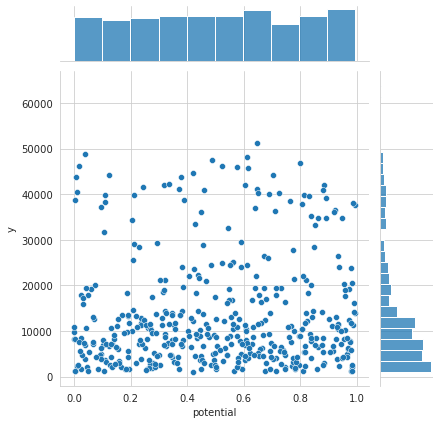

In [22]:
sns.jointplot(x ='potential', y ='y', data = train)

- Through the paitplot we can have a quick view of every feature behavior

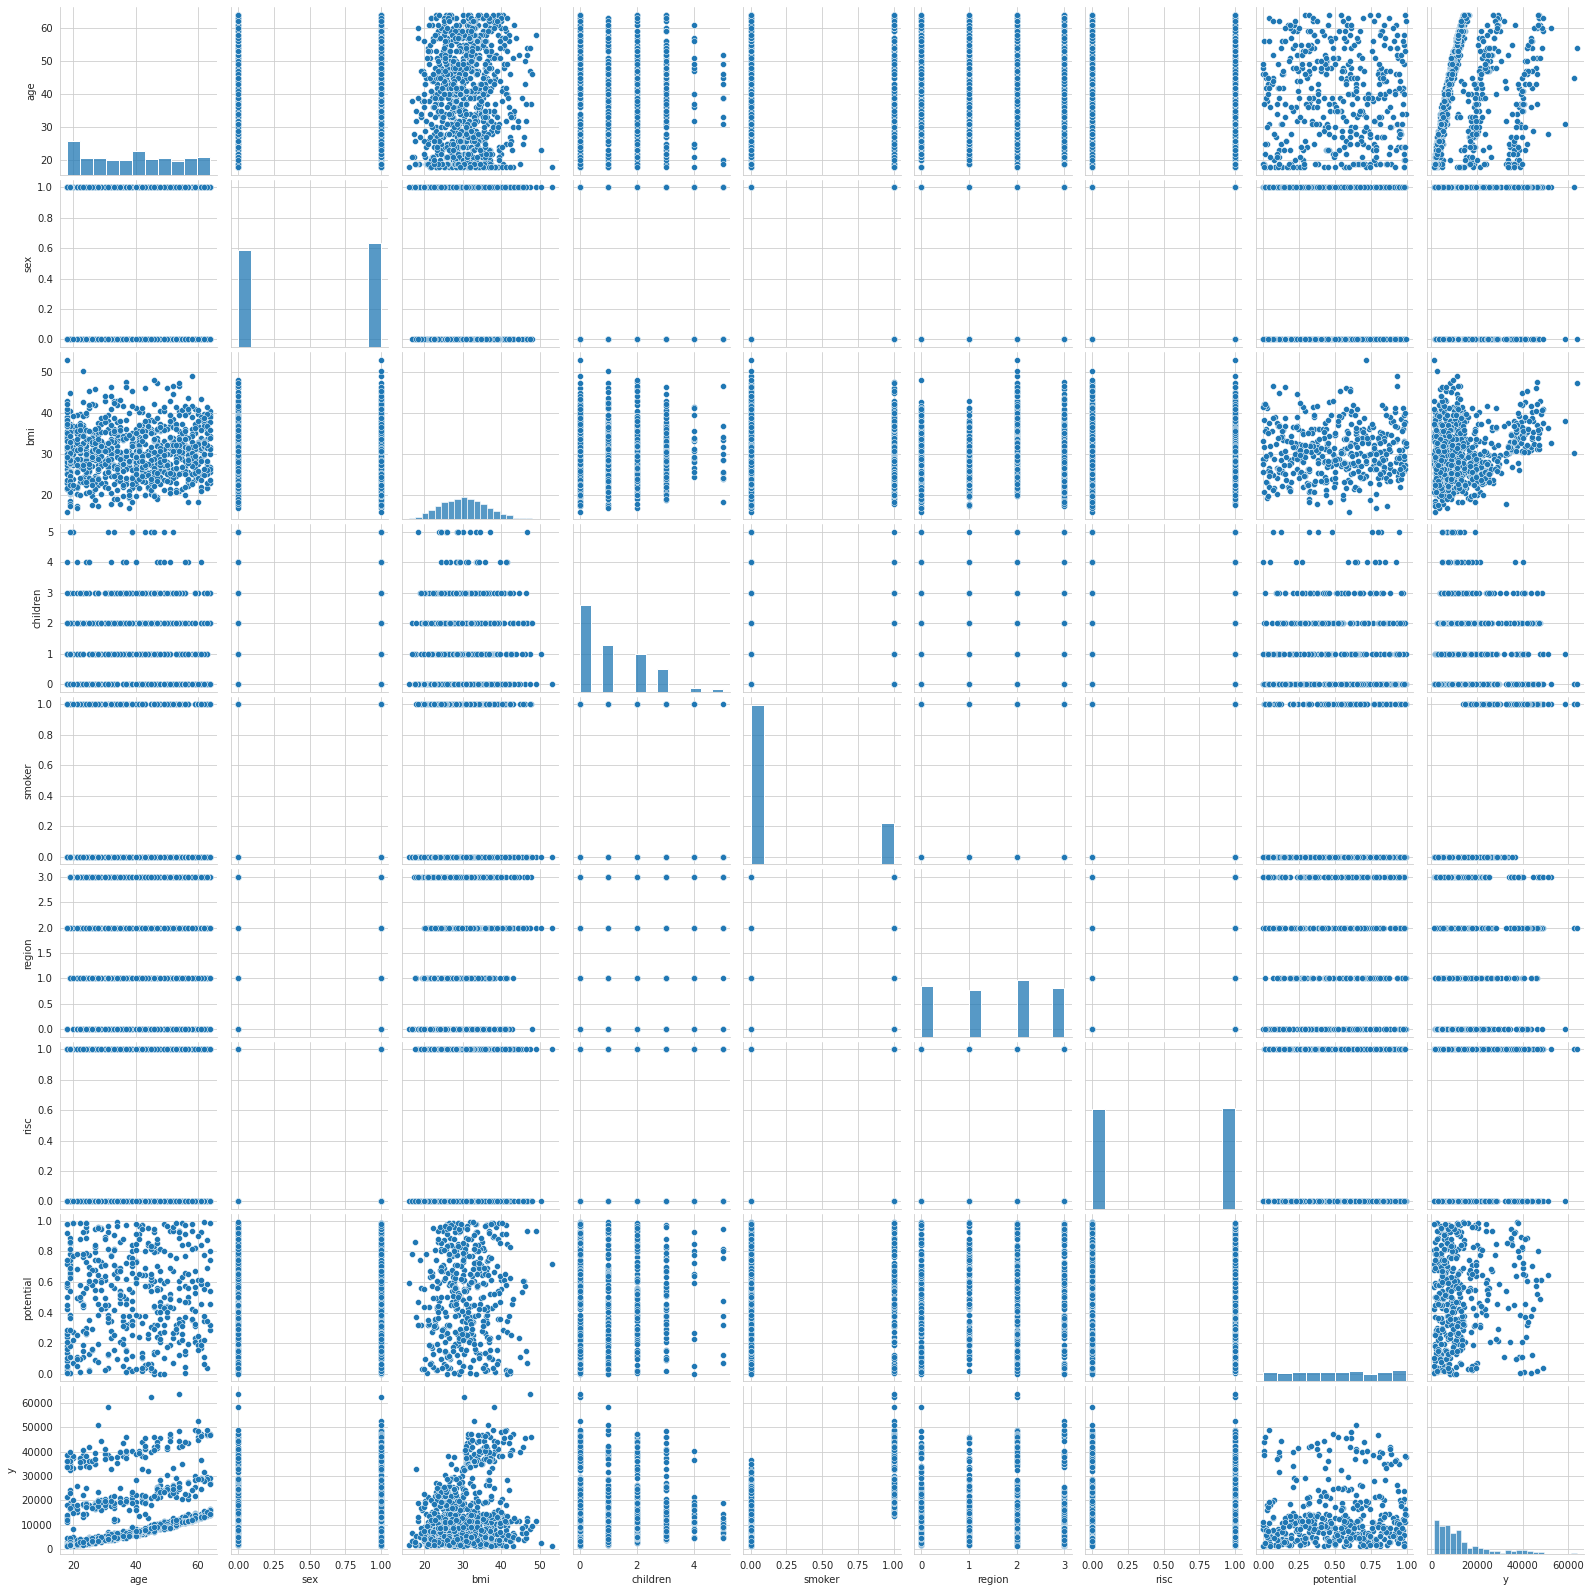

In [23]:
pairplot = sns.pairplot(train)
plt.show()

# Feature Selection

### Spearman Heatmap

<AxesSubplot:>

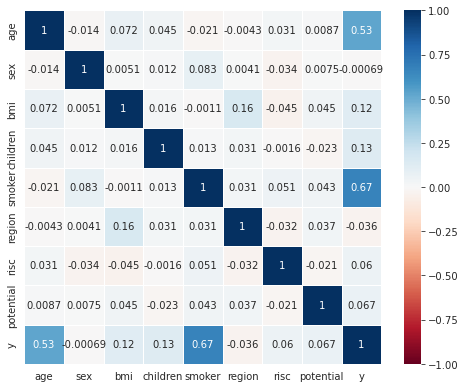

In [24]:
plt.rcParams["figure.figsize"] = [8, 6.5]
sns.heatmap(train.corr(method='spearman'), 
            vmin = -1, vmax=1, linewidths=.5,cmap='RdBu',annot=True)

### Pearson Heatmap

<AxesSubplot:>

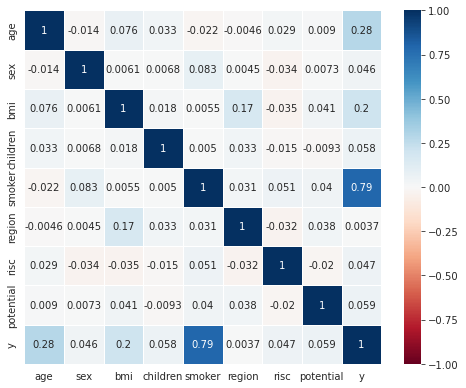

In [25]:
plt.rcParams["figure.figsize"] = [8, 6.5]
sns.heatmap(train.corr(method='pearson'), 
            vmin = -1, vmax=1, linewidths=.5,cmap='RdBu',annot=True)

<AxesSubplot:>

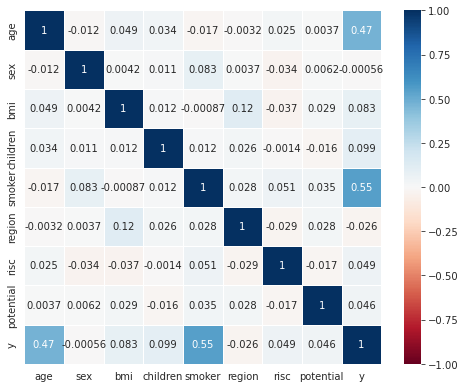

In [26]:
plt.rcParams["figure.figsize"] = [8, 6.5]
sns.heatmap(train.corr(method='kendall'), 
            vmin = -1, vmax=1, linewidths=.5,cmap='RdBu',annot=True)

- Looking at the heatmaps we can conclude that age, bmi, children and smoker are the variables which are most correlated with the target 

- Since `potential` is highly uncorrelated with the `y target`, and also has +50% of NaN values, it may be a disposable variable. 

In [27]:
# train.drop(columns=['potential'], inplace=True)
# test.drop(columns=['potential'], inplace=True)

train.potential.fillna(train.potential.mean(),inplace=True)
test.potential.fillna(test.potential.mean(),inplace=True)

- For both `test` and `train` data, missing `age` values are ~ <1%, so we'll just replace them w/ the respective median value for the column

In [28]:
train.age.fillna(round(train.age.mean()),inplace=True)
test.age.fillna(round(test.age.mean()),inplace=True)

# Models

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = train.drop(columns=['y'])
y = train['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29, test_size=0.25)

- Tree-based Models in general doesn't need regularization

### `DecisionTreeRegressor`

In [30]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [31]:
print('Score no teste: ', r2_score(y_test,y_pred))
print('Score no treino: ', r2_score(y_train,dt.predict(X_train)))

Score no teste:  0.77880321837962
Score no treino:  1.0


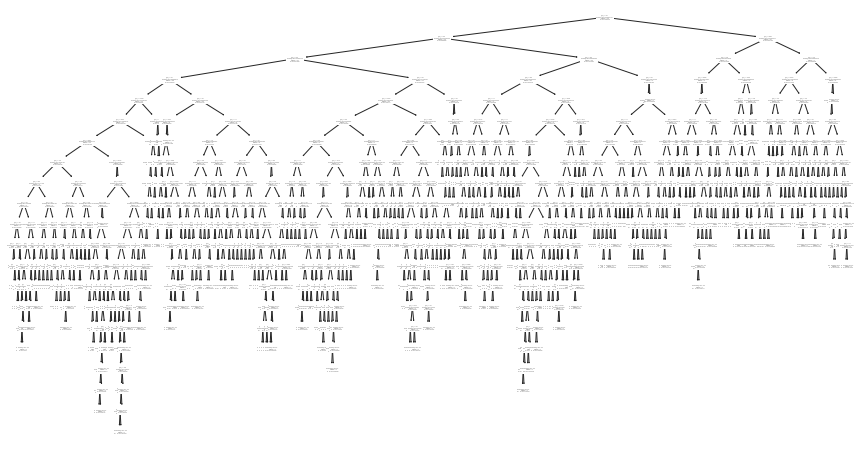

In [32]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(dt)
plt.show()

- Just as the results predict, it's a sort of overfitting. Let's try tunning

In [33]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['mse','mae', 'poisson','friedman_mse'],
    'max_depth': [3, 5, 8, 10, 15],
    'min_samples_split': np.arange(2,10,2),
    'min_samples_leaf': np.arange(2,10,2),
}

gs = GridSearchCV(DecisionTreeRegressor(), params, cv = 5, verbose=0, n_jobs=-1, scoring='r2') # n_jobs, 1 for GPU, -1 for CPU
gs.fit(X_train, y_train)

/home/thiago/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-pack

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'poisson', 'friedman_mse'],
                         'max_depth': [3, 5, 8, 10, 15],
                         'min_samples_leaf': array([2, 4, 6, 8]),
                         'min_samples_split': array([2, 4, 6, 8])},
             scoring='r2')

In [34]:
gs.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=4)

- Reevaluating the tunned model

In [35]:
gs.best_estimator_.fit(X_train,y_train)
pred_test = gs.best_estimator_.predict(X_test)
pred_train = gs.best_estimator_.predict(X_train)

/home/thiago/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


In [36]:
print('Score no teste: ', r2_score(y_test,pred_test))
print('Score no treino: ', r2_score(y_train,pred_train))

Score no teste:  0.8419550661022883
Score no treino:  0.8734797874525337


- Which is a surprisingly good result, not overfitted.

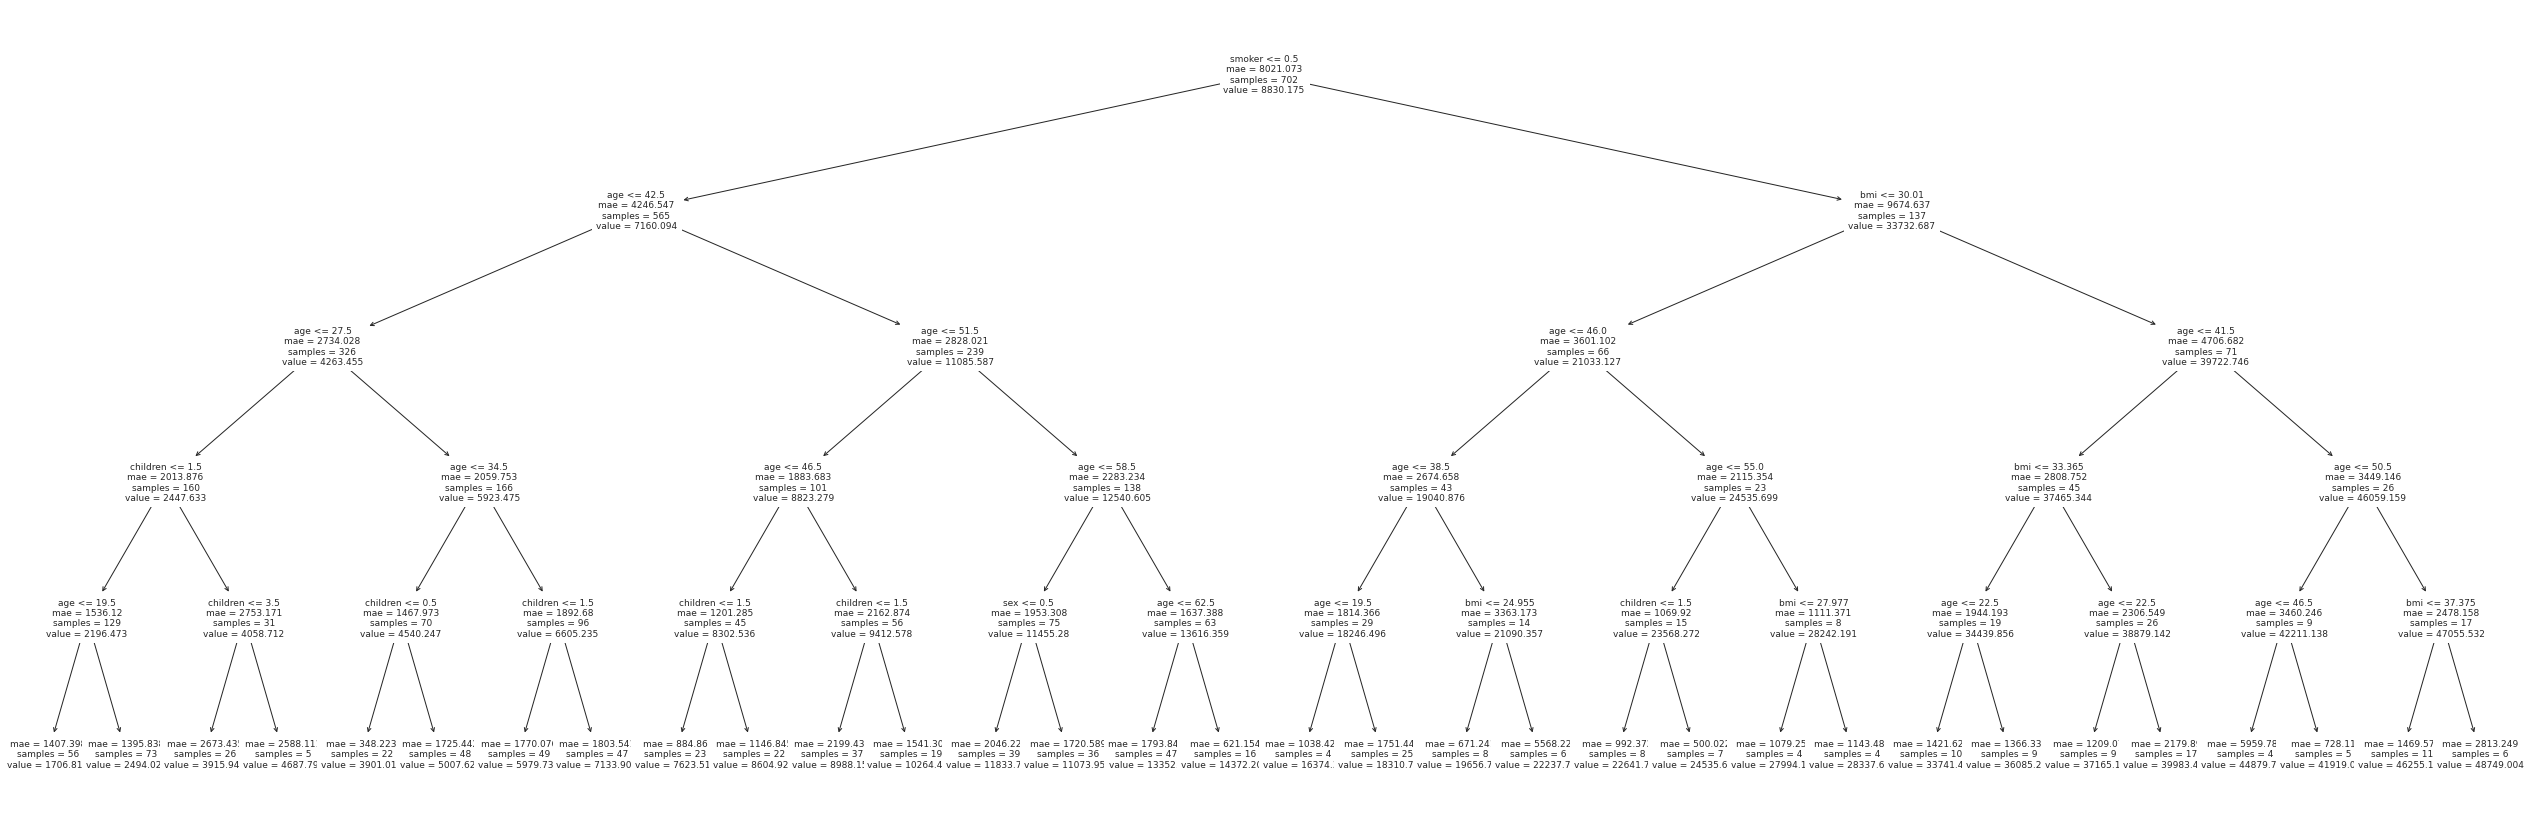

In [37]:
plt.figure(figsize=(45,15))
tree.plot_tree(gs.best_estimator_, fontsize=9,feature_names=X_test.columns)
plt.show()

### `RandomForestRegressor`

In [ ]:
from sklearn.ensemble import RandomForestRegressor

params = {
    'n_estimators': [25, 50, 100, 150, 200],
    'criterion': ['mse', 'mae','poisson'],
    'max_depth': [3],
}

gs = GridSearchCV(RandomForestRegressor(random_state=0), params, cv = 3, verbose=-1, n_jobs=-1, scoring='r2')
gs.fit(X_train, y_train)

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_estimator_ = RandomForestRegressor(criterion='poisson', max_depth=3, n_estimators=200, random_state=0)

In [ ]:
gs.best_estimator_.fit(X_train,y_train)
pred_test = gs.best_estimator_.predict(X_test)
pred_train = gs.best_estimator_.predict(X_train)

In [ ]:
print('Score no teste: ', r2_score(y_test,pred_test))
print('Score no treino: ', r2_score(y_train,pred_train))

In [ ]:
print('Score no teste: ', r2_score(y_test,pred_test))
print('Score no treino: ', r2_score(y_train,pred_train))

### `XGBRegressor`

In [ ]:
from xgboost import XGBRegressor

param = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'learning_rate' : [0.01, 0.3, 0.5],
        'n_estimators' : [100, 200, 500, 700, 1000],
        'objective': ['reg:squarederror']
    }


gs = GridSearchCV(XGBRegressor(random_state=138),param, cv = 5, n_jobs = -1, verbose = 1, scoring='r2')

gs.fit(X_train,y_train)

In [ ]:
gs.best_params_

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_estimator_ = XGBRegressor(colsample_bytree=0.7,learning_rate=0.01,max_depth=3,min_child_weight=5,
                                    n_estimators=900,objective='reg:squarederror',subsample=0.5)

In [ ]:
gs.best_estimator_.fit(X_train,y_train)
pred_test = gs.best_estimator_.predict(X_test)
pred_train = gs.best_estimator_.predict(X_train)

In [ ]:
print('Score no teste: ', r2_score(y_test,pred_test))
print('Score no treino: ', r2_score(y_train,pred_train))

In [ ]:
print('Score no teste: ', r2_score(y_test,pred_test))
print('Score no treino: ', r2_score(y_train,pred_train))

### `GradientBoostingRegressor` [Best Model]

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

params = {
    'n_estimators': np.arange(20,400,10),
    'max_depth': np.arange(3,6,1),
    'learning_rate': np.linspace(0.01,1,30),   
    'criterion': ['friedman_mse', 'squared_error', 'mse']
}

gs = GridSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5, verbose=2, n_jobs=-1, scoring='r2')
gs.fit(X_train, y_train)

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_estimator_.fit(X_train,y_train)
pred_test = gs.best_estimator_.predict(X_test)
pred_train = gs.best_estimator_.predict(X_train)

In [ ]:
print('Score no teste: ', r2_score(y_test,pred_test))
print('Score no treino: ', r2_score(y_train,pred_train))

# Submission

In [ ]:
test.head()

In [ ]:
gs.best_estimator_.fit(X,y)

y_sub = gs.best_estimator_.predict(test)

In [ ]:
sub_df = pd.DataFrame(y_sub, columns = ['y'], index = [i for i in range(936,1338)])
sub_df.index.rename('index', inplace=True)
sub_df

In [ ]:
sub_df.to_csv('submissions/16-ago-v11.csv')

In [ ]:
pd.read_csv('data/sample_submission.csv')